In [20]:
import json
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd

from dataset_prepare import CocoPose, CocoMetadata

In [23]:
#json_path = "/home/soonyau/datasets/ai_challenger/ai_challenger_valid.json"
#img_path = "/home/soonyau/datasets/"

json_path = "/home/soonyau/datasets/vainney2/train.json"
img_path = "/home/soonyau/datasets/vainney2/"

with open(json_path) as f:
    dataset = json.load(f)

In [19]:
data_len = len(dataset['annotations'])

for i in range(data_len-1, -1, -1):
    keypoint_len = len(dataset['annotations'][i]['keypoints'])
    if keypoint_len<42:
        del dataset['annotations'][i]

with open(json_path, "w") as f:
    json.dump(dataset, f)        

In [24]:
idx = 0
img_path = os.path.join(img_path, dataset['images'][idx]['file_name'])
keypoints = dataset['annotations'][idx]['keypoints']
print(keypoints)
print(img_path)

[275, 1059, 2, 134, 1126, 2, 271, 1424, 1, 313, 1334, 2, 204, 1360, 2, 243, 1328, 2, 262, 1430, 1, 825, 985, 2, 959, 1081, 2, 774, 1440, 1, 799, 1305, 2, 902, 1350, 1, 851, 1292, 2, 819, 1443, 1]
/home/soonyau/datasets/vainney2/train/VID_20190115_082911_003.jpg


/home/soonyau/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


(1920, 1080, 3)


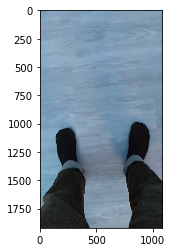

In [25]:
def read_image(img_path):
    img_str = open(img_path, "rb").read()
    if not img_str:
        print("image not read, path=%s" % img_path)
    nparr = np.fromstring(img_str, np.uint8)
    return cv2.imdecode(nparr, cv2.IMREAD_COLOR)

    
img_data = read_image(img_path)
h, w, _ = img_data.shape
print(img_data.shape)
plt.imshow(img_data)
plt.show()

19.2
put_heatmap.1: 240 309 1024 1093
put_heatmap.1: 99 168 1091 1160
put_heatmap.1: 236 305 1389 1458
put_heatmap.1: 278 347 1299 1368
put_heatmap.1: 169 238 1325 1394
put_heatmap.1: 208 277 1293 1362
put_heatmap.1: 227 296 1395 1464
put_heatmap.1: 790 859 950 1019
put_heatmap.1: 924 993 1046 1115
put_heatmap.1: 739 808 1405 1474
put_heatmap.1: 764 833 1270 1339
put_heatmap.1: 867 936 1315 1384
put_heatmap.1: 816 885 1257 1326
put_heatmap.1: 784 853 1408 1477


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


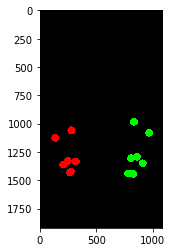

1.0


In [27]:
#plane_idx = 13
heatmap = np.zeros((14,h,w,))
sigma = 0.01*max(h,w)
print(sigma)

for plane_idx in range(14):
    center = (keypoints[plane_idx*3],keypoints[plane_idx*3+1])
    CocoMetadata.put_heatmap(heatmap, plane_idx, center, sigma)

merged = np.zeros((h,w,3))
merged[:,:,0] = np.amax(heatmap[:7,:,:], axis=0)
merged[:,:,1] = np.amax(heatmap[7:,:,:], axis=0)

plt.imshow(255*merged)
#plt.imshow(255*merged, cmap=plt.cm.gray)
#plt.imshow(255*heatmap[plane_idx,:,:], cmap=plt.cm.gray)
plt.show()
print(np.max(heatmap))

In [6]:
import math
heatmap.shape[:2]

(14, 681)

In [7]:
delta=math.sqrt(1.6052*2)
sigma=6
delta*sigma

10.750553474124018